In [1]:
#lOADING THE VEGETABLE DATASET DATASET
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Price.csv",parse_dates=True, index_col='1/5/2021')
# Display the first few rows
print(data)

              Tomato Big(Nepali)  Kg        50        60        55
1/5/2021                                                          
1/5/2021      Tomato Big(Indian)  Kg        50        60        55
1/5/2021     Tomato Small(Local)  Kg        30        35      32.5
1/5/2021    Tomato Small(Tunnel)  Kg        30        35      32.5
1/5/2021    Tomato Small(Indian)  KG        40        45      42.5
1/5/2021     Tomato Small(Terai)  KG        40        45      42.5
...                          ...  ..       ...       ...       ...
2023-09-28  Tomato Small(Indian)  KG  Rs 45.00  Rs 55.00  Rs 50.00
2023-09-28   Tomato Small(Local)  KG  Rs 50.00  Rs 60.00  Rs 55.00
2023-09-28  Tomato Small(Tunnel)  KG  Rs 60.00  Rs 75.00  Rs 69.00
2023-09-28              Turnip A  KG  Rs 70.00  Rs 80.00  Rs 75.00
2023-09-28    Water Melon(Green)  KG  Rs 50.00  Rs 60.00  Rs 56.67

[96479 rows x 5 columns]


#  1.DATA PREPROCESSING 

In [2]:
#EXTRACTING THE TOMATO RECORDS FROM THE DATASET
data = data[data.iloc[:, 0] == "Tomato Big(Indian)"]

In [3]:
#DROOPING THE UNWANTED COLUMN
data.drop(["Tomato Big(Nepali)","Kg"], axis=1,inplace=True)

In [4]:
#RENAMING THE COLUMNS
data.rename_axis('Date',inplace=True);data.rename(columns={
    '50': 'MinPrice',
    '60': 'MaxPrice',
    '55': 'AvgPrice',
}, inplace=True)

In [5]:
#REPLACING THE WORDS/NUMBERS/SYMBOLS NOT NEEDED
for column in ['MinPrice', 'MaxPrice', 'AvgPrice']:
    data[column] = data[column].str.replace(r'Rs ', '', regex=True).str.replace(',', '', regex=True)

In [6]:
#CHANGING THE'DATE' COLUMN AS INDEX AND ITS TYPE AS DATE
data.index = pd.to_datetime(data.index,format='mixed')
#EXTRACTING DATA BETWEEN THE GIVEN DATES
data = data[(data.index > '2022-09-01') & (data.index <= '2023-08-30')]

In [7]:
#CHANGING THE DATAtYPE OF COLUMNS
data['MinPrice'] = data['MinPrice'].astype('float64')
data['MaxPrice'] = data['MaxPrice'].astype('float64')
data['AvgPrice'] = data['AvgPrice'].astype('float64')

# 2.UNIVARIATE AND BIVARIATE ANALYSIS

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2022-09-02 to 2023-08-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MinPrice  302 non-null    float64
 1   MaxPrice  302 non-null    float64
 2   AvgPrice  302 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB


In [9]:
data["MaxPrice"]

Date
2022-09-02     60.0
2022-09-03     55.0
2022-09-04     60.0
2022-09-05     60.0
2022-09-06     60.0
              ...  
2023-08-26    110.0
2023-08-27    100.0
2023-08-28     90.0
2023-08-29     80.0
2023-08-30     80.0
Name: MaxPrice, Length: 302, dtype: float64

In [10]:
#IMPORTING FUNCTION TO CHECK THE STASTISTICS OF THE DATASET
from Descriptive import Descriptive
obj=Descriptive()
#segregating the quantitrative and qualitative variables in the stock dataset
quan,qual=obj.segreQuanQual(data)
des_data=obj.descriptive_Analysis(data,quan)
des_data

The Quantitative Data: ['MinPrice', 'MaxPrice', 'AvgPrice']
The Qualtitative Data []


,MinPrice,MaxPrice,AvgPrice
Null_count,0,0,0
NonNull_count,302,302,302
Total_Count,302,302,302
Mean,53.188742,62.980132,58.649238
Median,50.0,60.0,55.0
Mode,50.0,60.0,55.0
Std,16.873404,17.479735,17.126613
Min,30.0,40.0,35.0
Q1:25%,40.0,50.0,46.67
Q2:50%,50.0,60.0,55.0


In [11]:
lesser,greater = obj.outliercolumn(quan,des_data)

Lesser Range []
Greater Range ['MinPrice', 'MaxPrice', 'AvgPrice']


In [12]:
des_data=obj.changeoutlier(data,des_data,lesser,greater)

In [13]:
des_data

,MinPrice,MaxPrice,AvgPrice
Null_count,0,0,0
NonNull_count,302,302,302
Total_Count,302,302,302
Mean,53.188742,62.980132,58.649238
Median,50.0,60.0,55.0
Mode,50.0,60.0,55.0
Std,16.873404,17.479735,17.126613
Min,30.0,40.0,35.0
Q1:25%,40.0,50.0,46.67
Q2:50%,50.0,60.0,55.0


In [14]:
#probability distribution function which shows the area between given range
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,standard deviation=%.3f' % (sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Admin\AppData\Local\Temp\ipykernel_13996\404112669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=57.620,standard deviation=13.334
The area between range(60,100):0.443082649250281


0.443082649250281

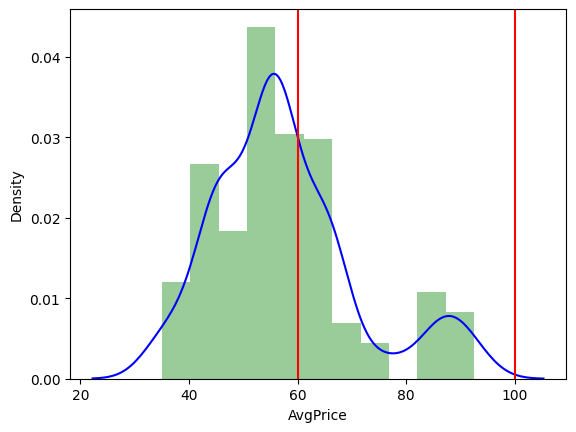

In [15]:
get_pdf_probability(data["AvgPrice"],60,100)

# 3. Stationarity Test

In [16]:
#TO CHECK FOR STATIONARITY ON THE TIMESERIES DATA
def adf_test_for_columns(df, columns):
    def adf_test(timeseries):
        from statsmodels.tsa.stattools import adfuller
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        print("Condition:")
        print("p-value<=0.05-->Accept Alternate Hypothesis")
        print("p-value>0.05-->Accept Null Hypothesis")
        if (dfoutput['Test Statistic'] < dfoutput["Critical Value (1%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (5%)"] or
            dfoutput['Test Statistic'] < dfoutput["Critical Value (10%)"] and
            dfoutput["p-value"] < 0.05):
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Reject null hypothesis:Non Stationarity")
            print("Accept Alternate hypothesis:Stationarity ")
            print("Stationarity based on ADH")
        else:
            print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
            print("Accept null hypothesis:Non Stationarity")
            print("Reject Alternate hypothesis:Stationarity ")
            print("Non-stationarity based on ADH*******************Applying difference and testing for Stationarity************")
            timeseries = timeseries.diff().dropna()
            adf_test(timeseries)
        return timeseries

    statORnot = {}
    for column in columns:
        print(f"\nTesting column: {column}")
        statORnot[column] = adf_test(df[column])
    
    return statORnot


In [17]:
columns_to_test = ['MinPrice', 'MaxPrice', 'AvgPrice']
statORnot = adf_test_for_columns(data, columns_to_test)


# Print the results
for column, output in statORnot.items():
    print(f"Column: {column}, Result: {output}")
   


Testing column: MinPrice
Results of Dickey-Fuller Test:
Test Statistic                  -3.291229
p-value                          0.015275
#Lags Used                       1.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Stationarity 
Stationarity based on ADH

Testing column: MaxPrice
Results of Dickey-Fuller Test:
Test Statistic                  -3.247548
p-value                          0.017392
#Lags Used                       1.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.5719

In [18]:
#DATASET AFTER APPLYING DIFFERENCIATION
tomato_df = pd.DataFrame(statORnot)

In [19]:
tomato_df

,MinPrice,MaxPrice,AvgPrice
Date,,,
2022-09-02,55.000,60.000,58.330
2022-09-03,50.000,55.000,52.500
2022-09-04,50.000,60.000,55.000
2022-09-05,55.000,60.000,57.500
2022-09-06,55.000,60.000,58.330
...,...,...,...
2023-08-26,90.000,90.000,90.000
2023-08-27,92.495,92.495,92.495
2023-08-28,80.000,90.000,85.000


In [20]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(tomato_df)
print("Len:",data1.shape)

Len: (302, 3)


# 4.Model Creation and Evaluation

In [21]:
#creating a dataframe, a dictionary, a list to fit the model and evaluating the metrics given
ds=pd.DataFrame(data1,columns=[["MinPrice","MaxPrice","AvgPrice"]])
performance={"Model":[],"RMSE":[],"MaPe":[],"Order":[]}
list1=["MinPrice","MaxPrice","AvgPrice"]

In [39]:
# Function to fit and evaluate VARMAX model
def combination(ds,listt):
    print(listt)
    datasetTwo=ds[listt]
    training_size=round(len(datasetTwo) * 0.95)    
    X_train =datasetTwo[:training_size]
    y_test=datasetTwo[training_size:]
    from statsmodels.tsa.api import VARMAX
    best_aic = float('inf')
    best_order = None
    best_model = None
    orders=[(1,1),(1,2),(2,1),(2,2),(3,1),(3,2)]
    for i in orders:
        print(i)
        model = VARMAX(X_train,order=i, trend='n') # c indicates a constant trend
        results = model.fit(disp=False)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = i
            best_model=results
    for_steps=len(y_test)
    pred = best_model.get_forecast(for_steps).predicted_mean
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(y_test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(y_test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Order"].append(best_order)
    perf1=pd.DataFrame(performance)
    return perf1,best_model,pred,X_train,y_test
    #result.summary()

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
perf1,best_model,pred,X_train,y_test=combination(ds,list1)

['MinPrice', 'MaxPrice', 'AvgPrice']
(1, 1)
Order = (1, 1)
AIC:  -3415.969783744982
BIC:  -3328.142210566751
(1, 2)
Order = (1, 2)
AIC:  -3429.3021171752057
BIC:  -3308.5392040551383
(2, 1)
Order = (2, 1)
AIC:  -3433.7008854347678
BIC:  -3312.9379723147003
(2, 2)
Order = (2, 2)
AIC:  -3420.241568468752
BIC:  -3266.543315406848
(3, 1)
Order = (3, 1)
AIC:  -3430.432562317908
BIC:  -3276.734309256004
(3, 2)
Order = (3, 2)
AIC:  -3413.6133605063233
BIC:  -3226.9797675025825


In [42]:
perf1

,Model,RMSE,MaPe,Order
0,"[MinPrice, MaxPrice, AvgPrice]",0,4.142695e+13,"(2, 1)"
1,"[MinPrice, MaxPrice, AvgPrice]",1,7.520642e-01,"(2, 1)"


# 5. Forecasting on the best model

In [59]:
# Forecasting for the next 60 steps
forecast=best_model.forecast(steps=15)

In [60]:
forecast

,MinPrice,MaxPrice,AvgPrice
287,0.153129,0.179867,0.167685
288,0.148947,0.174616,0.163661
289,0.145791,0.170200,0.160144
290,0.142756,0.166390,0.156808
291,0.140037,0.162936,0.153716
292,0.137375,0.159670,0.150720
293,0.134816,0.156553,0.147836
294,0.132309,0.153541,0.145028
295,0.129861,0.150619,0.142296
296,0.127460,0.147775,0.139629


In [61]:
# Inverse transform the forecast
forecast_ori = Ms.inverse_transform(forecast)
forecast_df = pd.DataFrame(forecast_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

In [62]:
forecast_df

,MinPrice,MaxPrice,AvgPrice
0,39.569775,49.442137,44.641063
1,39.308449,49.166456,44.409689
2,39.111224,48.934671,44.207488
3,38.921530,48.734619,44.015696
4,38.751595,48.553306,43.837901
5,38.585238,48.381878,43.665618
6,38.425321,48.218242,43.499802
7,38.268657,48.060116,43.338411
8,38.115646,47.906755,43.181335
9,37.965633,47.757444,43.027975


#Inversing from he differenciation applied
#last_known_value = data.iloc[-1]
#recovered_forecast =forecast_df.cumsum() + last_known_value

In [63]:
# Inverse transform the predicted data
t_test_ori=Ms.inverse_transform(y_test)
y_test_ori_df = pd.DataFrame(y_test_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

In [64]:
y_test_ori_df

,MinPrice,MaxPrice,AvgPrice
0,50.000,60.000,55.000
1,50.000,60.000,55.000
2,50.000,60.000,55.000
3,50.000,60.000,56.670
4,50.000,60.000,56.670
5,60.000,70.000,65.000
6,60.000,70.000,65.000
7,60.000,70.000,66.670
8,50.000,60.000,55.000
9,60.000,70.000,65.000


# 6. Plotting Actual vs Forecasted data

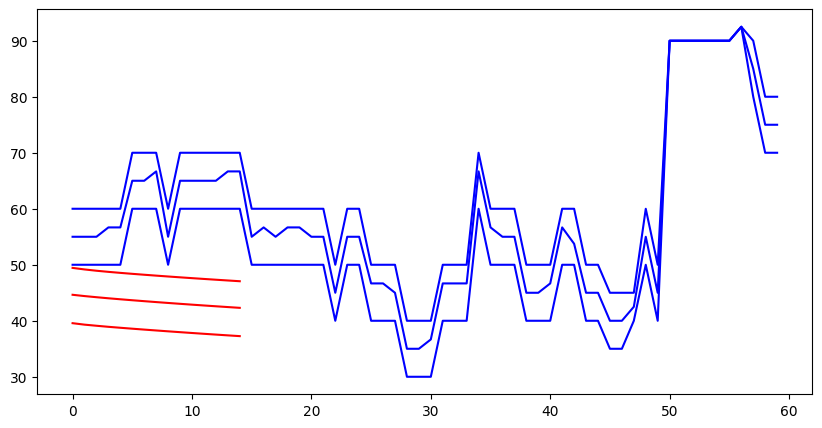

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test_ori_df, color = 'blue', label="Actual")
plt.plot(forecast_df, color = 'red', label ="Predicted")

In [66]:
# Inverse transform the predicted data
pred_ori=Ms.inverse_transform(pred)
pred_ori_df = pd.DataFrame(pred_ori, columns=['MinPrice', 'MaxPrice', 'AvgPrice'])

# 7.Plotting the actual(y_test) and Predicted data for the next 60 days

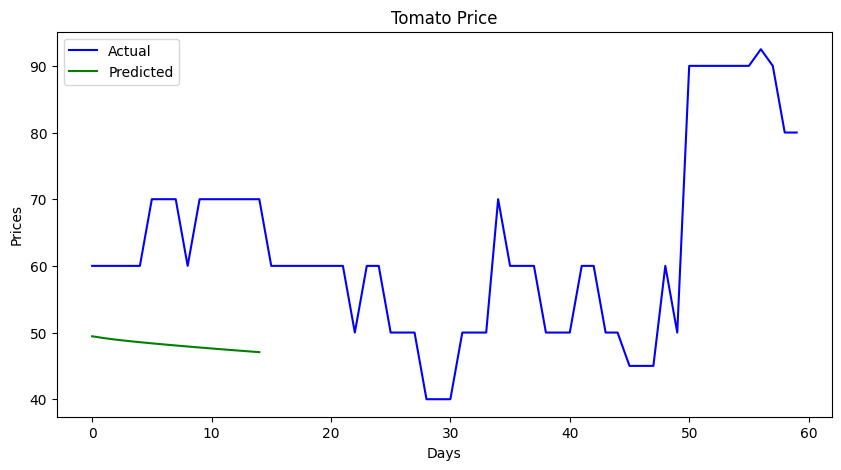

In [67]:
from stockFunctions import graph
graph(y_test_ori_df["MaxPrice"],pred_ori_df["MaxPrice"],"Actual","Predicted","Tomato Price","Days","Prices")